In [25]:
from typing import TypedDict, Dict, List
from langgraph.graph import StateGraph, END
import random

In [26]:
class AgentState(TypedDict):
    name: str
    number_list: List[int]
    counter: int

In [28]:
def greeting_node(state: AgentState) -> AgentState:
    state["name"] = f"Hello, {state['name']}! Let's generate a random number list."
    state['counter'] = 0
    return state

def generate_number_node(state: AgentState) -> AgentState:
    random_number = random.randint(1, 100)
    state['number_list'].append(random_number)
    state['counter'] += 1
    return state

def should_end_node(state: AgentState) -> AgentState:
    if state['counter'] >= 5:
        return "exit"
    
    else:
        print("Entering loop again.", state['counter'])
        return "loop"

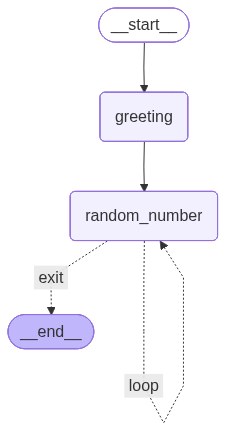

In [29]:
graph = StateGraph(AgentState)
graph.add_node("greeting", greeting_node)
graph.add_node("random_number", generate_number_node)

graph.add_edge("greeting", "random_number")
graph.add_conditional_edges(
    "random_number",
    should_end_node,
    {
        "exit": END,
        "loop": "random_number",
    },
)

graph.set_entry_point("greeting")
app = graph.compile()

from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))


In [31]:
result = app.invoke({
    "name": "Alice",
    "number_list": [],
    "counter": -2
    })

print(result)

Entering loop again. 1
Entering loop again. 2
Entering loop again. 3
Entering loop again. 4
{'name': "Hello, Alice! Let's generate a random number list.", 'number_list': [75, 84, 46, 85, 52], 'counter': 5}
